05/04/2023

# P2i7 : Retournement temporel

In [1]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as animation

L'équation d'onde s'écrit en deux dimensions :
$$
\frac{\partial^2 u}{\partial t^2}(\alpha,t) = v^2 \times \bigtriangleup u(\alpha,t)
$$
Avec $\alpha = (x,y)$ la variable d'espace et $\bigtriangleup u (\alpha,t) = \frac{\partial^2 u}{\partial x^2}(\alpha,t) + \frac{\partial^2 u}{\partial y^2}(\alpha,t) $

On s'est ici placé dans le cas où la vitesse des ondes dans le milieu est de $v$

#### Création de l'espace de simulation :

On va en tout premier lieu considérer un ensemble discrétisé en forme de carré $\Omega$ de bord $\partial \Omega$

In [3]:
# Dimensions de l'espace
Lx = 10 # largeur
Ly = 10 # longueur


# Discrétisation
Nx = 80 # nombre de points sur l'axe X
Ny = 80 # nombre de points sur l'axe Y


# Construction des axes
X = np.linspace(0, Lx, Nx)   # Vecteur d'abscisses x
dx = X[2] - X[1]                # dx est la différence entre deux points sur x

Y = np.linspace(0, Ly, Ny)   # Vecteur d'ordonnées Y
dy = Y[2] - Y[1]                # dy est la différence entre deux points sur y

# Paramètres de simulation
Ti = 0                      # Temps initial de la simulation (s)
Tf = 10                     # Temps final de simulation (s)
Niter = 400                # Nombre d'itérations
dt = (Tf-Ti)/Niter          # Pas de temps (s)
v = 1                       # Vitesse de propagation des ondes dans le milieu (m/s) 

La méthode des `différences finies` est celle que nous allons utiliser.

// Insérer l'explication des calculs

In [34]:
# Création du vecteur U
u = np.zeros([Niter, len(X), len(Y)])    # Stockage des différentes valeurs de u. Pour chaque itération, un nouveau vecteur de taille (X, Y) décrivant l'espace est créé. u est le vecteur de ces vecteurs (il y en a Niter au total).


###############################
### PARAMETRAGE DES SOURCES ###
###############################

# Création du vecteur de points exclus (pour conserver l'intégrité du signal source lors de la résolution). Les points exclus sont ceux qui n'ont pas pour valeur `None`
init = np.full([Niter, len(X), len(Y)], None)

# Conditions initiales
u[0, Nx // 2, Ny // 2] = np.sin(0)       # Ici la source est une seule source ponctuelle située au centre. On initialise directement sur `u` car `init` décrit seulement la géometrie des soruces, et non pas l'espace

# Effets de la source
i = 1
while i < 100:
    init[i, Nx // 2, Ny // 2] = np.sin(i/10)
    i += 1

# Conditions aux limites
init[:, 0, :] = 0 # côté haut
init[:, -1, :] = 0 # côté bas
init[:, :, 0] = 0 # côté gauche
init[:, :, -1] = 0 # côté droit

#### Résolution de l'EDP

Après avoir discrétisé l'équation aux dérivées partielles par le moyen de la méthode des différences finies, on peut calculer successivement les valeurs de la solution en tout point de notre espace, à chaque fois pour le pas de temps suivant

In [35]:
#######################################
### RESOLUTION DE L'EQUATION D'ONDE ###
#######################################

# Résolution de l'EDP --> Probablement lente, on pourra voir à la fin pour optimiser
for i in range(0, Niter-1):         # On connaît déjà l'état de l'espace à t=0, donc le calcul commencera à `i+1 = 1`
    print(f"Calcul pour i = {i+1}/{Niter-1}")

    # Itération sur les X
    for pos_x in range(0,Nx):


        # Au bord gauche en X ? -> Dérivée partielle par rapport à X avancée (à droite)
        if pos_x == 0:

            for pos_y in range(0,Ny):   
                # Au bord gauche en Y ? -> Dérivée partielle par rapport à Y avancée (à droite)
                if pos_y == 0:          
                    u[i+1, pos_x, pos_y] = (dt*v)**2 * ((2*u[i, pos_x, pos_y] - 5*u[i, pos_x+1, pos_y] + 4*u[i, pos_x+2, pos_y] - u[i, pos_x+3, pos_y])/(dx**2) + (2*u[i, pos_x, pos_y] - 5*u[i, pos_x, pos_y+1] + 4*u[i, pos_x, pos_y+2] - u[i, pos_x, pos_y+3])/(dy**2)) + 2*u[i, pos_x, pos_y] - u[i-1, pos_x, pos_y] if (init[i+1, pos_x, pos_y] == None) else init[i+1, pos_x, pos_y]  # Calcul si le point n'est pas exclu, égal à la condition initiale sinon.

                # Au bord droite en Y ? -> Dérivée partielle par rapport à Y retardée (à gauche)
                if pos_y == len(Y)-1:
                    u[i+1, pos_x, pos_y] = (dt*v)**2 * ((2*u[i, pos_x, pos_y] - 5*u[i, pos_x+1, pos_y] + 4*u[i, pos_x+2, pos_y] - u[i, pos_x+3, pos_y])/(dx**2) + (2*u[i, pos_x, pos_y] - 5*u[i, pos_x, pos_y-1] + 4*u[i, pos_x, pos_y-2] - u[i, pos_x, pos_y-3])/(dy**2)) + 2*u[i, pos_x, pos_y] - u[i-1, pos_x, pos_y] if (init[i+1, pos_x, pos_y] == None) else init[i+1, pos_x, pos_y]

                # Si on n'est pas au bord Y
                else:    
                    u[i+1, pos_x, pos_y] = (dt*v)**2 * ((2*u[i, pos_x, pos_y] - 5*u[i, pos_x+1, pos_y] + 4*u[i, pos_x+2, pos_y] - u[i, pos_x+3, pos_y])/(dx**2) + (u[i, pos_x, pos_y+1] - 2*u[i, pos_x, pos_y] + u[i, pos_x, pos_y-1])/(dy**2)) + 2*u[i, pos_x, pos_y] - u[i-1, pos_x, pos_y] if (init[i+1, pos_x, pos_y] == None) else init[i+1, pos_x, pos_y]


        # Au bord droite en X ? -> Dérivée partielle par rapport à X retardée (à gauche)
        elif pos_x == len(X)-1:
                for pos_y in range(0,Ny):
                    # Au bord gauche en Y ? -> Dérivée partielle par rapport à Y avancée (à droite)
                    if pos_y == 0:          
                        u[i+1, pos_x, pos_y] = (dt*v)**2 * ((2*u[i, pos_x, pos_y] - 5*u[i, pos_x-1, pos_y] + 4*u[i, pos_x-2, pos_y] - u[i, pos_x-3, pos_y])/(dx**2) + (2*u[i, pos_x, pos_y] - 5*u[i, pos_x, pos_y+1] + 4*u[i, pos_x, pos_y+2] - u[i, pos_x, pos_y+3])/(dy**2)) + 2*u[i, pos_x, pos_y] - u[i-1, pos_x, pos_y] if (init[i+1, pos_x, pos_y] == None) else init[i+1, pos_x, pos_y]

                    # Au bord droite en Y ? -> Dérivée partielle par rapport à Y retardée (à gauche)
                    if pos_y == len(Y)-1:
                        u[i+1, pos_x, pos_y] = (dt*v)**2 * ((2*u[i, pos_x, pos_y] - 5*u[i, pos_x-1, pos_y] + 4*u[i, pos_x-2, pos_y] - u[i, pos_x-3, pos_y])/(dx**2) + (2*u[i, pos_x, pos_y] - 5*u[i, pos_x, pos_y-1] + 4*u[i, pos_x, pos_y-2] - u[i, pos_x, pos_y-3])/(dy**2)) + 2*u[i, pos_x, pos_y] - u[i-1, pos_x, pos_y] if (init[i+1, pos_x, pos_y] == None) else init[i+1, pos_x, pos_y]

                    # Si on n'est pas au bord Y
                    else:    
                        u[i+1, pos_x, pos_y] = (dt*v)**2 * ((2*u[i, pos_x, pos_y] - 5*u[i, pos_x-1, pos_y] + 4*u[i, pos_x-2, pos_y] - u[i, pos_x-3, pos_y])/(dx**2) + (u[i, pos_x, pos_y+1] - 2*u[i, pos_x, pos_y] + u[i, pos_x, pos_y-1])/(dy**2)) + 2*u[i, pos_x, pos_y] - u[i-1, pos_x, pos_y] if (init[i+1, pos_x, pos_y] == None) else init[i+1, pos_x, pos_y]


        # Si on n'est pas au bord X
        else:    
            # Itération sur les Y
            for pos_y in range(0,Ny):

                # Au bord gauche en Y ? -> Dérivée partielle par rapport à Y avancée (à droite)
                if pos_y == 0:          
                    u[i+1, pos_x, pos_y] = (dt*v)**2 * ((u[i, pos_x+1, pos_y] - 2*u[i, pos_x, pos_y] + u[i, pos_x-1, pos_y])/(dx**2) + (2*u[i, pos_x, pos_y] - 5*u[i, pos_x, pos_y+1] + 4*u[i, pos_x, pos_y+2] - u[i, pos_x, pos_y+3])/(dy**2)) + 2*u[i, pos_x, pos_y] - u[i-1, pos_x, pos_y] if (init[i+1, pos_x, pos_y] == None) else init[i+1, pos_x, pos_y]

                # Au bord droite en Y ? -> Dérivée partielle par rapport à Y retardée (à gauche)
                elif pos_y == len(Y)-1:
                    u[i+1, pos_x, pos_y] = (dt*v)**2 * ((u[i, pos_x+1, pos_y] - 2*u[i, pos_x, pos_y] + u[i, pos_x-1, pos_y])/(dx**2) + (2*u[i, pos_x, pos_y] - 5*u[i, pos_x, pos_y-1] + 4*u[i, pos_x, pos_y-2] - u[i, pos_x, pos_y-3])/(dy**2)) + 2*u[i, pos_x, pos_y] - u[i-1, pos_x, pos_y] if (init[i+1, pos_x, pos_y] == None) else init[i+1, pos_x, pos_y]

                # Si on n'est pas au bord Y
                else:    
                    u[i+1, pos_x, pos_y] = (dt*v)**2 * ((u[i, pos_x+1, pos_y] - 2*u[i, pos_x, pos_y] + u[i, pos_x-1, pos_y])/(dx**2) + (u[i, pos_x, pos_y+1] - 2*u[i, pos_x, pos_y] + u[i, pos_x, pos_y-1])/(dy**2)) + 2*u[i, pos_x, pos_y] - u[i-1, pos_x, pos_y] if (init[i+1, pos_x, pos_y] == None) else init[i+1, pos_x, pos_y]

Calcul pour i = 1/399
Calcul pour i = 2/399
Calcul pour i = 3/399
Calcul pour i = 4/399
Calcul pour i = 5/399
Calcul pour i = 6/399
Calcul pour i = 7/399
Calcul pour i = 8/399
Calcul pour i = 9/399
Calcul pour i = 10/399
Calcul pour i = 11/399
Calcul pour i = 12/399
Calcul pour i = 13/399
Calcul pour i = 14/399
Calcul pour i = 15/399
Calcul pour i = 16/399
Calcul pour i = 17/399
Calcul pour i = 18/399
Calcul pour i = 19/399
Calcul pour i = 20/399
Calcul pour i = 21/399
Calcul pour i = 22/399
Calcul pour i = 23/399
Calcul pour i = 24/399
Calcul pour i = 25/399
Calcul pour i = 26/399
Calcul pour i = 27/399
Calcul pour i = 28/399
Calcul pour i = 29/399
Calcul pour i = 30/399
Calcul pour i = 31/399
Calcul pour i = 32/399
Calcul pour i = 33/399
Calcul pour i = 34/399
Calcul pour i = 35/399
Calcul pour i = 36/399
Calcul pour i = 37/399
Calcul pour i = 38/399
Calcul pour i = 39/399
Calcul pour i = 40/399
Calcul pour i = 41/399
Calcul pour i = 42/399
Calcul pour i = 43/399
Calcul pour i = 44/3

**Remarque :** Le code ci-dessus est assez complexe, mais il n'est en fait pas sensiblement plus lent que le code de base (ci-dessous)

```py
for i in range(0,Niter-1):      # On connaît déjà l'état de l'espace à t=0
    print(f"Calcul pour i = {i+1}/{Niter-1}")
    # Itération sur les X
    for pos_x in range(0,Nx):
        # Itération sur les Y
        if (pos_x != 0) and (pos_x != len(X)-1):          # Si on n'est pas au bord X
            for pos_y in range(1,Ny):
                if (((pos_y != 0) and (pos_y != len(Y)-1))) and ((pos_x, pos_y) not in excl):   # Si on n'est pas au bord Y
                    u[i+1, pos_x, pos_y] = (dt*v)**2 * ( (u[i, pos_x+1, pos_y] - 2*u[i, pos_x, pos_y] + u[i, pos_x-1, pos_y])/(dx**2) + (u[i, pos_x, pos_y+1] - 2*u[i, pos_x, pos_y] + u[i, pos_x, pos_y-1])/(dy**2) ) + 2*u[i, pos_x, pos_y] - u[i-1, pos_x, pos_y]
```

Ensuite, nous pouvons visualiser le résultat avec une animation :

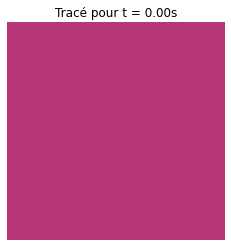

In [36]:
#################
### ANIMATION ###
#################

def animer(espace : np.array, dt : float, Niter : int, Ti : float, Tf : float,  interpol : str = "bilinear"):
    # Création de la figure et des paramètres
    fig = plt.figure()
    minimum = u.min()       # Bornes pour la heatmap, sinon ça fait des flash
    maximum = u.max()
    titre = plt.title("Tracé pour t = 0s")
    image = plt.imshow(u[0], cmap='magma', interpolation=interpol, vmin=minimum, vmax=maximum)
    plt.axis('off')

    # Pour converser la vitesse de l'animation même si on change les paramètres de simulation.
    # En théorie ça marche, en pratique ça marche pas parce qu'on est limité par les performances de python et de la machine
    interval = 4*((Tf-Ti)/Niter)

    # Fonction de mise à jour de l'animation
    def updatefig(i):
        image.set_array(u[i])
        titre.set_text(f"Tracé pour t = {i*dt:.2f}s")
        return image, titre

    # Animation
    ani = animation.FuncAnimation(fig, updatefig, frames=range(0, Niter), interval=interval, blit=False)

    return ani


ani = animer(u, dt, Niter, Ti, Tf)

# Nécessaire pour affichage dans le notebook, sinon un simple `plt.show()` peut suffire
# A noter : la vitesse de l'animation ne peut pas être contrôlée lorsqu'elle est convertie en html de cette manière
HTML(ani.to_jshtml())

#### Retournement temporel

En appliquant le principe des [miroirs temporels instantanés](https://www.refletsdelaphysique.fr/articles/refdp/abs/2021/02/refdp202169p28/refdp202169p28.html), il est possible de retourner les ondes à n'importe quel moment pendant leur évolution, contrairement aux miroirs classiques (transducteur + traitement informatisé) qui ne peuvent retourner l'onde qu'au moment où elle atteint les transducteurs.

Sur la figure ci-dessous, un retournement est effectué en simulant une variation drastique des propriétés du mileu à `t = 10s`

In [30]:
print(u)

[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 0.00000000e+00  0.0